<a href="https://colab.research.google.com/github/kug4586/I_m_learing_ML/blob/main/BreamandSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 도미와 빙어 구분하기


종류: 도미, 곤들매기, 농어, 강꼬치고기, 로치, 빙어, 송어


## 1. 데이터 준비하기
> 데이터는 [여기](https://gist.github.com/rickiepark)서 가저옴

### (1) 도미

In [1]:
# 도미 데이터 준비
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

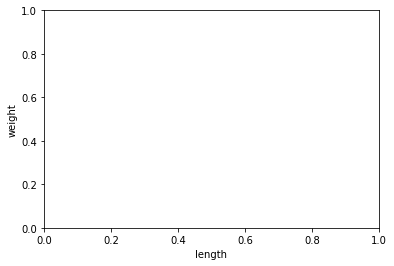

In [2]:
# matplotlib를 써서 그래프 그리기
import matplotlib.pyplot as plt

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### (2) 빙어

In [3]:
# 빙어 데이터 준비
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

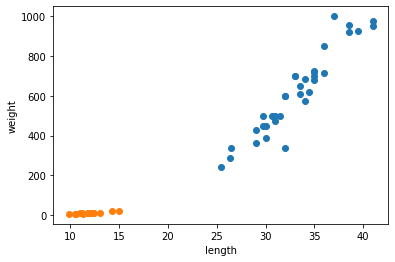

In [4]:
# matplotlib를 써서 두 물고기 데이터를 그래프로 표시
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 주황색이 빙어, 파란색이 도미

## 2. 구분하기
k - 최근접 이웃(k-Nearest neighbors) 알고리즘을 써서 구분

In [5]:
# 두 생선 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 2차원 배열로 변형 : zip()
fish_data = [[l,w] for l,w in zip(length,weight)]

In [6]:
# 정답 레이블 만들기
fish_target = [1]*35 + [0]*14   # 정답 레이블을 이렇게 만드는건 우리가 순서대로 입력했기 때문

In [7]:
# 사이킷런의 KNeighborsClassifier 로드
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [8]:
# 모델 훈련
# (데이터, 정답)
kn.fit(fish_data, fish_target)

# 모델 평가 : 0~1 사이의 실수 반환
# (데이터, 정답)
kn.score(fish_data, fish_target)

1.0

In [10]:
# 새로운 데이터 예측
kn.predict([[30, 600]])

array([1])

In [ ]:
# KNeighborsClasifier에 대하여
# _fit_X 속성 = fish_data
# _y = fish_target
print(kn._fit_X)
print(kn._y)

In [15]:
# 이 알고리즘으로 예측할 때, 참고할 데이터 수 변경
kn49 = KNeighborsClassifier(n_neighbors=49) # 49개의 데이터 참고
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [17]:
print(35/49)

0.7142857142857143


## 3. 오류 개선
모델을 제대로 평가하려면,

훈련용 데이터와 평가용 데이터가 따로 있어야 한다.

In [19]:
kn = KNeighborsClassifier()

In [18]:
# 리스트의 인덱스(index)와 슬라이싱(slicing)
print(fish_data[4])
print(fish_data[:5])

[29.0, 430.0]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [22]:
# 데이터 나누기
# 잘못된 방법 : 인덱스 34를 기준으로 나누면, 훈련 데이터는 도미만, 평가 데이터는 빙어만 있다.
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### * 넘파이 numpy
대표적인 파이썬 배열 라이브러리

In [24]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr.shape)

(49, 2)


In [26]:
# !주의!
# 배열을 섞을 때, (데이터 - 정답)이 같이 섞여야 한다.
# 안 그럼, 도미 데이터의 정답이 빙어로 될지도...

np.random.seed(42) # 일정한 결과를 얻기 위해
index = np.arange(49) # 0 ~ 49-1 까지의 정수로 이루어진 배열
np.random.shuffle(index) # 섞기
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [27]:
# 배열 인덱싱 : 여러개의 원소를 출력
# ex. input_arr[ [1,3,7] ] = [ 2번째 데이터, 4번째 데이터, 8번째 데이터 ]
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [28]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

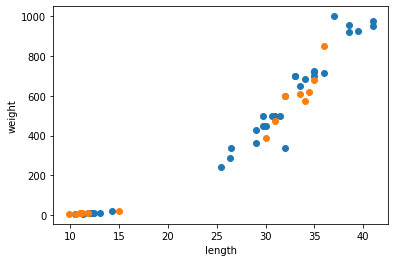

In [30]:
# 데이터셋 확인
# 주황색 = 평가 / 파란색 = 훈련
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
kn = kn.fit(train_input,train_target)
print(kn.score(test_input, test_target))
# 테스트 데이터로 예측한 결과 = 정답
print(kn.predict(test_input))
print(test_target)

1.0
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
